In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns
import string

In [2]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [5]:
base_26 = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/pH/ph_baseline_2.6_cropped.nc', decode_times=True)
oae_26 = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/pH/ph_OAE_2.6_cropped.nc', decode_times=True)

In [6]:
base_70 = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0/pH/ph_baseline_7.0_cropped.nc', decode_times=True)
oae_70 = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0/pH/ph_OAE_7.0_cropped.nc', decode_times=True)

In [7]:
base_26 = base_26.ph[0,:].to_dataset(name='ph')
oae_26 = oae_26.ph[0,:].to_dataset(name='ph')
base_70 = base_70.ph[0,:].to_dataset(name='ph')
oae_70 = oae_70.ph[0,:].to_dataset(name='ph')

In [8]:
base_26 = base_26.sel(time_counter=slice('2090', '2100'))
oae_26 = oae_26.sel(time_counter=slice('2090', '2100'))
base_70 = base_70.sel(time_counter=slice('2090', '2100'))
oae_70 = oae_70.sel(time_counter=slice('2090', '2100'))

In [9]:
month_length_baseline = base_26.time_counter.dt.days_in_month
base_26 = ((base_26 * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

In [10]:
month_length_oae = oae_26.time_counter.dt.days_in_month
oae_26 = ((oae_26 * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

In [11]:
max_base_26 = base_26.resample(time_counter='AS').max('time_counter')

In [12]:
min_base_26 = base_26.resample(time_counter='AS').min('time_counter')

In [13]:
amplitude_base_26 = (max_base_26['ph'] - min_base_26['ph']).to_dataset(name='ph')

In [14]:
amplitude_base_26_map = (amplitude_base_26.ph.mean(dim=('time_counter'))).to_dataset(name='ph')

In [15]:
max_oae_26 = oae_26.resample(time_counter='AS').max('time_counter')

In [16]:
min_oae_26 = oae_26.resample(time_counter='AS').min('time_counter')

In [17]:
amplitude_oae_26 = (max_oae_26['ph'] - min_oae_26['ph']).to_dataset(name='ph')

In [18]:
amplitude_oae_26_map = (amplitude_oae_26.ph.mean(dim=('time_counter'))).to_dataset(name='ph')

In [19]:
amplitude_change_26 = amplitude_oae_26 - amplitude_base_26

In [20]:
amplitude_change_26_map = (amplitude_change_26.ph.mean(dim=('time_counter'))).to_dataset(name='ph')

In [21]:
month_length_baseline = base_70.time_counter.dt.days_in_month
base_70 = ((base_70 * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

In [22]:
month_length_oae = oae_70.time_counter.dt.days_in_month
oae_70 = ((oae_70 * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

In [23]:
max_base_70 = base_70.resample(time_counter='AS').max('time_counter')

In [24]:
min_base_70 = base_70.resample(time_counter='AS').min('time_counter')

In [25]:
amplitude_base_70 = (max_base_70['ph'] - min_base_70['ph']).to_dataset(name='ph')

In [26]:
amplitude_base_70_map = (amplitude_base_70.ph.mean(dim=('time_counter'))).to_dataset(name='ph')

In [27]:
max_oae_70 = oae_70.resample(time_counter='AS').max('time_counter')

In [28]:
min_oae_70 = oae_70.resample(time_counter='AS').min('time_counter')

In [29]:
amplitude_oae_70 = (max_oae_70['ph'] - min_oae_70['ph']).to_dataset(name='ph')

In [30]:
amplitude_oae_70_map = (amplitude_oae_70.ph.mean(dim=('time_counter'))).to_dataset(name='ph')

In [31]:
amplitude_change_70 = amplitude_oae_70 - amplitude_base_70

In [32]:
amplitude_change_70_map = (amplitude_change_70.ph.mean(dim=('time_counter'))).to_dataset(name='ph')

In [33]:
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

In [34]:
cmapdiff = sns.diverging_palette(220, 20, as_cmap=True)

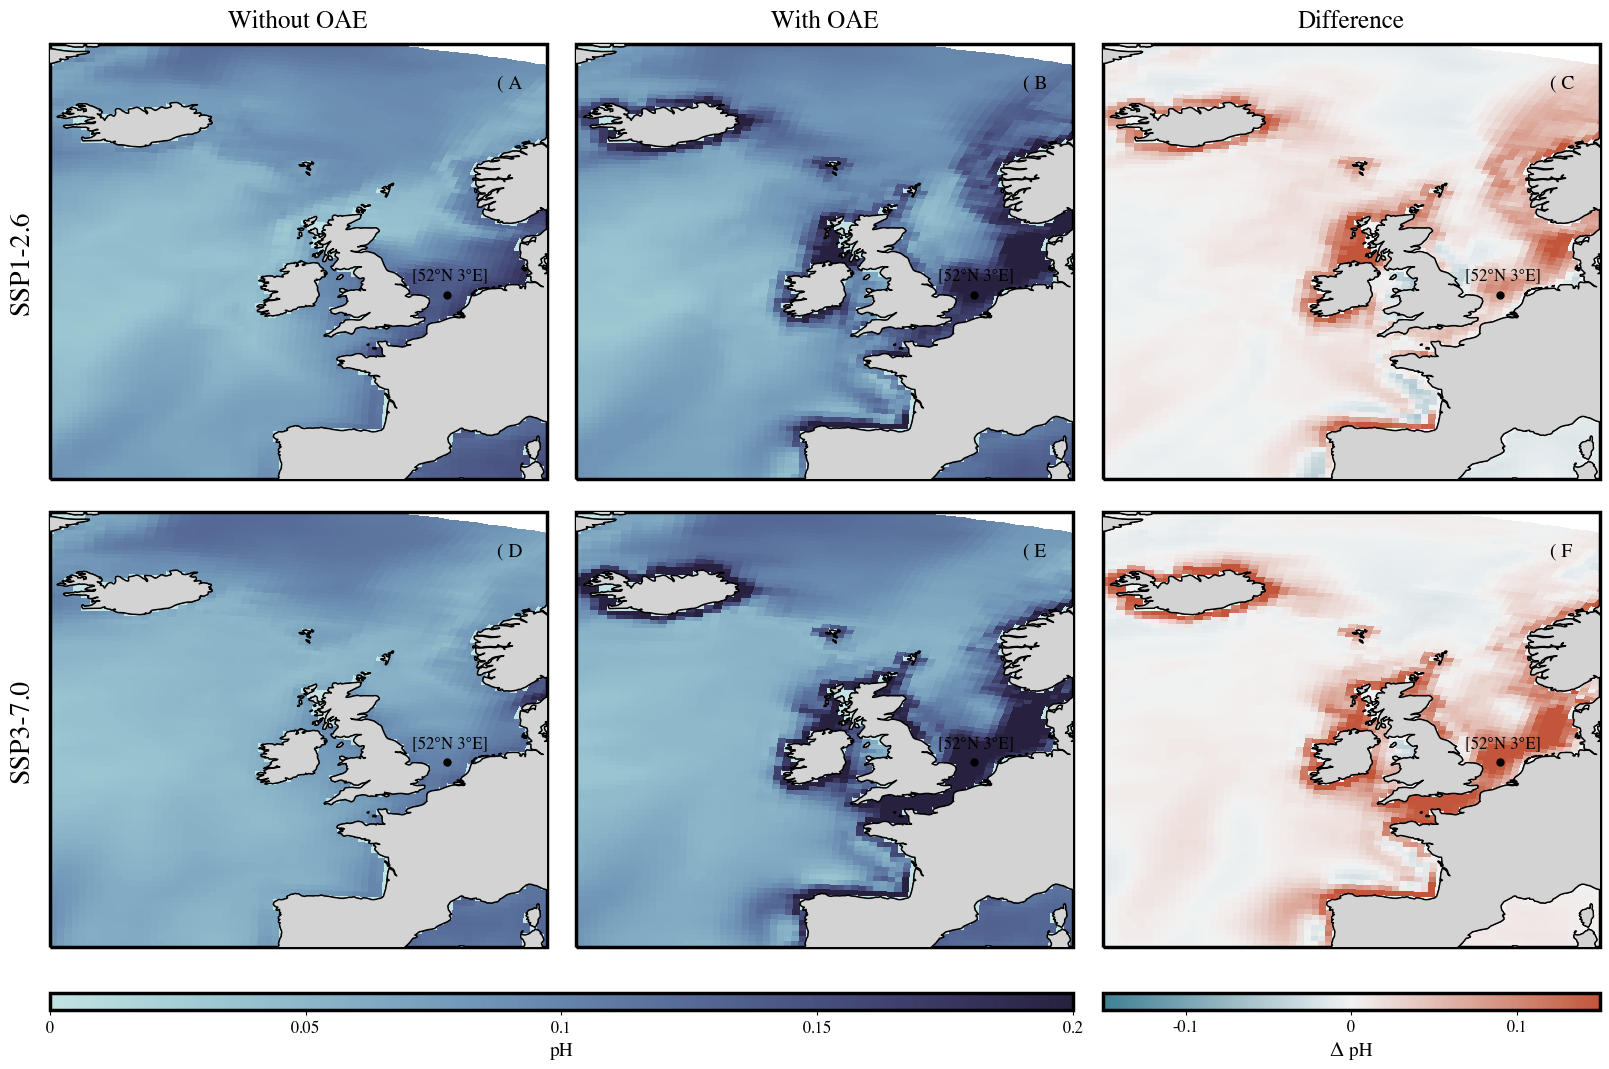

In [35]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 15))
plt.subplots_adjust(wspace=0.06, hspace=0)

im1 = amplitude_base_26_map.ph.plot.pcolormesh(
        ax=ax1, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=0.2,
        cmap=cmap,
        add_colorbar=False
    )
    
im2 = amplitude_oae_26_map.ph.plot.pcolormesh(
        ax=ax2, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=0.2,
        cmap=cmap,
        add_colorbar=False
    )
    
im3 = amplitude_change_26_map.ph.plot.pcolormesh( 
        ax=ax3, x="nav_lon", y="nav_lat",
        vmin=-0.15,
        vmax=0.15,
        cmap=cmapdiff, 
        add_colorbar=False
    )
    
im4 = amplitude_base_70_map.ph.plot.pcolormesh(
        ax=ax4, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=0.2,
        cmap=cmap,
        add_colorbar=False
    )
    
im5 = amplitude_oae_70_map.ph.plot.pcolormesh(
        ax=ax5, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=0.2,
        cmap=cmap,
        add_colorbar=False
    )
    
im6 = amplitude_change_70_map.ph.plot.pcolormesh( 
        ax=ax6, x="nav_lon", y="nav_lat",
        vmin=-0.15,
        vmax=0.15,
        cmap=cmapdiff, 
        add_colorbar=False
    )

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for ax in axes:
    ax.coastlines()
    ax.set_extent([-25, 10, 40, 70])
    ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')
    ax.plot(3, 53, "o", color='black', markersize=5)
    ax.text(0.5, 54,'[52°N 3°E]', fontsize=12, color='black')

for ax in axes: 
    if ax == ax1:
        ax.set_title("Without OAE", fontsize=18, y=1.02)
    elif ax == ax2:
        ax.set_title("With OAE", fontsize=18, y=1.02),
    elif ax == ax3:
        ax.set_title("Difference", fontsize=18, y=1.02),
    else:
        ax.set_title("", fontsize=16, y=1.02)
        
for n, ax in enumerate(axes):
    ax.text(0.9, 0.9, string.punctuation[7] + ' ' + string.ascii_uppercase[n], transform=ax.transAxes, 
            size=14, weight='bold', color='black')

font_size = 12
        
cbar = plt.colorbar(im1, ax = [ax1, ax2, ax4, ax5], aspect = 60, pad=0.04, location='bottom', ticks=[0, 0.05, 0.1, 0.15, 0.2])
cbar.set_label('pH', fontsize=14)
cbar.ax.tick_params(labelsize=font_size)
cbar.ax.set_xticklabels(['0', '0.05', '0.1', '0.15', '0.2'])

cb3= plt.colorbar(im3,ax= [ax3, ax6], aspect = 30, pad=0.04, location='bottom', ticks=[-0.1, 0, 0.1])
cb3.set_label('Δ pH', fontsize=14)
cb3.ax.yaxis.get_offset_text().set(size=14)
cb3.ax.tick_params(labelsize=font_size)
cb3.ax.set_xticklabels(['-0.1', '0', '0.1'])
ax.text(-102,85, 'SSP1-2.6', rotation=90, fontsize=20)
ax.text(-102,52, 'SSP3-7.0', rotation=90, fontsize=20)

pass

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/finals/final_figs/ph_ampl.png')